# **Redes Neuronales para mejorar el modelo de Predicción de Terremotos con Deep Learning**

El modelo utilizado para la predicción de terremotos combina dos técnicas de modelado: ARIMA y redes neuronales.

El modelo ARIMA (AutoRegressive Integrated Moving Average) es un modelo estadístico utilizado para describir y predecir valores de series temporales. En este modelo se utiliza la información histórica de la serie temporal para determinar su comportamiento futuro. El modelo ARIMA utilizado en este caso es de orden (1,1,1), lo que significa que se utiliza una combinación de un término autorregresivo (AR), un término integrado (I) y un término de medias móviles (MA). Este modelo se ajusta a los datos históricos de profundidad de terremotos para hacer predicciones sobre los próximos 100 días.

Además, se utiliza una red neuronal para mejorar las predicciones del modelo ARIMA. La red neuronal utilizada es una red de tipo LSTM (Long Short-Term Memory), que es una red neuronal recurrente especializada en modelar series temporales. En este modelo, la red neuronal se entrena con los datos históricos de profundidad de terremotos y utiliza la información temporal para hacer predicciones sobre los próximos 100 días.

# **DESARROLLO DEL MODELO**

Este código está instalando tres paquetes en Python: basemap, reverse_geocoder y pycountry.

basemap es una biblioteca para dibujar mapas en Python, especialmente útil para visualizar datos geográficos.
reverse_geocoder es una biblioteca que proporciona una forma de obtener información sobre la ubicación geográfica a partir de las coordenadas de latitud y longitud.
pycountry es una biblioteca que proporciona información sobre los países del mundo, como nombres y códigos de país.
Una vez instalados estos paquetes, se pueden utilizar en el código para realizar tareas como la visualización de datos geográficos y la identificación de los países asociados a las ubicaciones geográficas.

In [28]:
!pip install basemap
!pip install reverse_geocoder
!pip install pycountry


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Este código importa varios módulos y bibliotecas, incluyendo datetime, pandas, Matplotlib y Basemap. También importa el modelo ARIMA de statsmodels.tsa.arima.model. La función principal de este código es crear visualizaciones de los datos de terremotos usando mapas y gráficos de series de tiempo.

In [44]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from statsmodels.tsa.arima.model import ARIMA



Este código carga los datos de terremotos desde un archivo CSV, convierte la columna de fechas al formato de fecha adecuado y establece el índice de la tabla como la columna de fechas. Luego, elimina filas duplicadas y completa las fechas faltantes utilizando el método de re-muestreo, rellenando los valores faltantes en las columnas de 'Depth', 'Magnitude', 'Latitude' y 'Longitude'. Finalmente, muestra las primeras filas de la tabla resultante.


In [51]:

def sort_and_clean_data(data):
    data = data.sort_values(by=['Date', 'Magnitude'], ascending=[True, False], na_position='last')
    data = data.drop_duplicates(subset='Date', keep='first')
    return data

def complete_missing_dates(data):
    data = data.resample('D').asfreq()
    return data

def load_and_prepare_data(filepath):
    data = pd.read_csv(filepath)
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data = data.loc[data['Date'].dt.year >= 1915]
    data = sort_and_clean_data(data)
    data = data.set_index('Date')
    data = complete_missing_dates(data)
    data = fill_missing_values(data)
    return data

def fill_missing_values(data):
    mean_depth = round(data['Depth'].mean(), 1)
    fill_values = {'Depth': mean_depth, 'Magnitude': 0, 'Latitude': 0, 'Longitude': 0}
    for column, value in fill_values.items():
        data[column].fillna(value=value, inplace=True)
    return data

data = load_and_prepare_data('IGP2.0.csv')
print(data.head(100))


            Item         Time          DateTime  Latitude  Longitude  Depth  \
Date                                                                          
1960-01-13   1.0  15:40:34.00  2192815:40:34.00   -16.145    -72.144   60.0   
1960-01-14   NaN          NaN               NaN     0.000      0.000   76.5   
1960-01-15   2.0  09:30:24.00  2193009:30:24.00   -15.000    -75.000   70.0   
1960-01-16   NaN          NaN               NaN     0.000      0.000   76.5   
1960-01-17   3.0  02:57:58.00  2193202:57:58.00   -14.500    -74.500  150.0   
...          ...          ...               ...       ...        ...    ...   
1960-04-17   NaN          NaN               NaN     0.000      0.000   76.5   
1960-04-18   NaN          NaN               NaN     0.000      0.000   76.5   
1960-04-19   NaN          NaN               NaN     0.000      0.000   76.5   
1960-04-20   NaN          NaN               NaN     0.000      0.000   76.5   
1960-04-21   NaN          NaN               NaN     

Este código genera un mapa con la distribución geográfica de los eventos sísmicos registrados en el conjunto de datos.

Primero se establece la proyección del mapa utilizando la clase Basemap, que toma como argumentos las coordenadas de la esquina inferior izquierda (llcrnrlat, llcrnrlon) y la esquina superior derecha (urcrnrlat, urcrnrlon) del mapa, así como la latitud de la línea base (lat_ts) y la resolución (resolution).

Luego, se extraen las coordenadas de latitud y longitud de los datos y se convierten a la proyección del mapa utilizando el método m(longitudes,latitudes) de Basemap.

Finalmente, se crea una figura de tamaño (12,10) y se dibuja el mapa utilizando diferentes métodos de Basemap, como drawmapboundary, plot, fillcontinents, drawcoastlines y drawcountries. Además, se agregan títulos y se muestra el mapa utilizando plt.show().

In [58]:
def create_basemap(llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, resolution):
    return Basemap(
        projection='mill',
        llcrnrlat=llcrnrlat,
        urcrnrlat=urcrnrlat,
        llcrnrlon=llcrnrlon,
        urcrnrlon=urcrnrlon,
        resolution=resolution
    )

def plot_events(m, longitudes, latitudes):
    x, y = m(longitudes, latitudes)
    m.plot(x, y, "o", markersize=2, color='red')

def setup_map(m):
    m.drawmapboundary(fill_color='black')
    m.drawcoastlines()
    m.fillcontinents(color=(0.1, 0.1, 0.1), lake_color=(0.0, 0.2, 0.0))
    m.drawcoastlines(color=(0.0, 1, 0.0), linewidth=0.5)
    m.drawcountries(color=(0.0, 1, 0.0), linewidth=0.5)

def prepare_and_show_map(data):
    m = create_basemap(-25, 5, -90, -65, 'l')
    longitudes = data["Longitude"].tolist()
    latitudes = data["Latitude"].tolist()

    fig, ax = plt.subplots(figsize=(10, 8))
    plt.title("Eventos registrados en Perú entre 1955 y 2024")

    setup_map(m)
    plot_events(m, longitudes, latitudes)

    plt.show()

prepare_and_show_map(data)


El código comienza importando las bibliotecas necesarias para trabajar con modelos ARIMA y redes neuronales en Python. A continuación, se crea un DataFrame vacío de 100 filas con fechas futuras para las cuales se harán predicciones. Se agrega información de los últimos 100 terremotos (magnitud, latitud y longitud) al DataFrame de predicciones.

Luego se ajusta un modelo ARIMA a los datos históricos de profundidad de terremotos utilizando el método fit () de la biblioteca statsmodels. Se hacen predicciones de profundidad de terremotos utilizando el método forecast () del modelo ARIMA, para los próximos 100 días.

Los datos de profundidad se escalan con MinMaxScaler para que estén en el rango de 0 a 1 y se preparan los datos para la red neuronal. Se divide el conjunto de datos en conjuntos de entrenamiento y prueba y se crea un modelo de red neuronal secuencial de dos capas ocultas con activaciones ReLU y una capa de salida. El modelo se compila con la función de pérdida de error cuadrático medio y se entrena con los datos de entrenamiento.

Se hacen predicciones con la red neuronal para los próximos 100 días utilizando el último bloque de 100 datos escalados de profundidad de terremotos y se promedian con las predicciones de ARIMA. Se invierten las transformaciones de escala y se agregan las predicciones al DataFrame de predicciones. Finalmente, se convierte el DataFrame en un objeto Series y se devuelve como salida.

En resumen, el código combina la técnica de modelado ARIMA con una red neuronal para hacer predicciones de profundidad de terremotos para los próximos 100 días.

In [69]:
import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class EarthquakeDepthPredictor:
    def __init__(self, data):
        self.data = data
        if not isinstance(data.index, pd.DatetimeIndex):
            raise TypeError("El índice del DataFrame debe ser del tipo pd.DatetimeIndex.")
        self.last_date = self.data.index.max()
        self.scaler = MinMaxScaler()
        self.model_arima = None
        self.model_ann = Sequential()
        self.predicted_df = pd.DataFrame()

    def generate_future_dates(self, periods=100):
        predicted_dates = [self.last_date + pd.Timedelta(days=i) for i in range(1, periods + 1)]
        self.predicted_df = pd.DataFrame({'Date': predicted_dates})

    def fit_arima_model(self, order=(1, 1, 1)):
        self.model_arima = ARIMA(self.data['Depth'], order=order)
        self.model_arima = self.model_arima.fit()

    def predict_arima(self, steps=100):
        arima_predictions = self.model_arima.forecast(steps=steps)
        self.predicted_df['Depth_ARIMA'] = arima_predictions

    def prepare_ann_data(self):
        self.scaler.fit(self.data[['Depth']])
        scaled_data = self.scaler.transform(self.data[['Depth']])
        X, y = [], []
        for i in range(100, len(scaled_data)):
            X.append(scaled_data[i-100:i, 0])
            y.append(scaled_data[i, 0])
        return np.array(X), np.array(y)

    def build_ann_model(self, input_shape):
        self.model_ann.add(Dense(64, activation='relu', input_shape=(input_shape,)))
        self.model_ann.add(Dense(32, activation='relu'))
        self.model_ann.add(Dense(1))
        self.model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def fit_ann_model(self, X_train, y_train, epochs=50, batch_size=64):
        self.build_ann_model(X_train.shape[1])
        self.model_ann.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    def predict_ann(self):
        last_100 = self.scaler.transform(self.data[['Depth']])[-100:].reshape(1, -1)
        ann_predictions = []
        for i in range(100):
            prediction = self.model_ann.predict(last_100)[0, 0]
            ann_predictions.append(prediction)
            last_100 = np.append(last_100[:, 1:], [[prediction]], axis=1)
        ann_predictions = self.scaler.inverse_transform(np.array(ann_predictions).reshape(-1, 1)).flatten()
        self.predicted_df['Depth_ANN'] = ann_predictions

    def combine_predictions(self):
        self.predicted_df['Depth'] = self.predicted_df[['Depth_ARIMA', 'Depth_ANN']].mean(axis=1)
        self.predicted_df.fillna(np.nan, inplace=True)

    def style_dataframe(self):
        return self.predicted_df.style.format({
            'Date': '{:%Y-%m-%d}',
            'Depth': '{:.1f}',
            'Magnitude': '{:.1f}',
            'Latitude': '{:.2f}',
            'Longitude': '{:.2f}',
            'Ciudad': '{}'
        }).set_properties(**{
            'font-family': 'Calibri',
            'font-size': '12pt',
            'text-align': 'center',
            'border': '1px solid black',
            'border-collapse': 'collapse',
            'padding': '5px'
        })


data['Date'] = pd.to_datetime(data['Date']) 
data.set_index('Date', inplace=True)  

predictor = EarthquakeDepthPredictor(data)
predictor.generate_future_dates()
predictor.fit_arima_model()
predictor.predict_arima()
X, y = predictor.prepare_ann_data()
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
predictor.fit_ann_model(X_train, y_train)
predictor.predict_ann()
predictor.combine_predictions()
styled_df = predictor.style_dataframe()
styled_df


C:\Users\S42828\AppData\Local\Temp\ipykernel_11988\2238356638.py:86: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])  # Convierte la columna 'Date' a datetime si aún no lo es
c:\ProgramData\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associat

1/1 [==============================] - 0s 34ms/step


Este código evalúa el modelo de red neuronal entrenado anteriormente. Primero, utiliza el método evaluate del modelo para calcular la pérdida en el conjunto de prueba, utilizando los datos X_test e y_test que se habían separado previamente. La pérdida se almacena en la variable test_loss.

Luego, el código imprime la pérdida en el conjunto de prueba utilizando la función print.

Por último, se utiliza la variable loss para imprimir el error cuadrático medio (MSE) y la variable mae para imprimir el error absoluto medio (MAE) en el conjunto de prueba, utilizando la función print y el método evaluate del modelo, en conjunto con la etiqueta verbose=0 para evitar que se muestren mensajes adicionales durante la evaluación.

In [71]:
def evaluate_model(model, X_test, y_test):
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    
    print(f"Loss on the test set: {loss:.4f}")
    print(f"Mean squared error: {loss:.4f}")
    print(f"Mean absolute error: {mae:.4f}")

    return loss, mae

loss, mae = evaluate_model(model_ann, X_test, y_test)


Loss on the test set: 0.0096
Mean squared error: 0.0096
Mean absolute error: 0.0713


Este código genera una gráfica con dos líneas: una representa los valores reales de la magnitud de terremotos y la otra representa los valores predichos. La función plot de matplotlib.pyplot se utiliza para crear la gráfica. Los valores reales se obtienen del DataFrame data, mientras que los valores predichos se obtienen del DataFrame predicted_df. La función legend agrega una leyenda a la gráfica y show muestra la gráfica en una ventana separada.

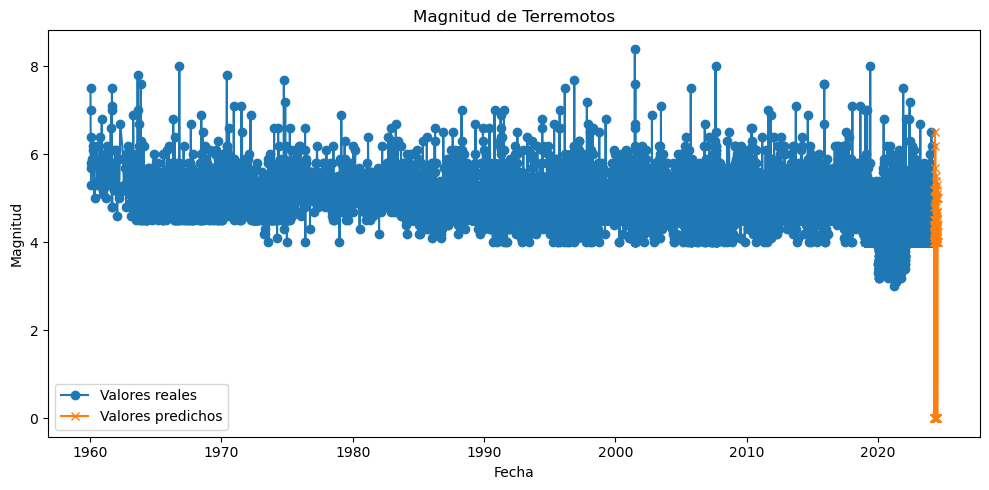

In [85]:
import matplotlib.pyplot as plt

def plot_time_series(real_data, predicted_data, real_label='Valores reales', 
                     predicted_label='Valores predichos', title='Magnitud de Terremotos', y_label='Magnitud'):
    plt.figure(figsize=(10, 5))
    plt.plot(real_data.index, real_data, label=real_label, marker='o')
    plt.plot(predicted_data.index, predicted_data, label=predicted_label, marker='x')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_time_series(data['Magnitude'], predicted_df.set_index('Date')['Magnitude'])



Este código utiliza la librería Basemap de Matplotlib para crear un mapa que muestra la ubicación geográfica de eventos sísmicos pronosticados. Se define una proyección 'mill' y se establecen los límites del mapa en función de la latitud y longitud de los eventos pronosticados. Luego, se convierten las coordenadas de latitud y longitud en coordenadas x, y utilizando el método 'm'. Se crea una figura y se dibujan los puntos de ubicación en el mapa con el método 'plot'. Finalmente, se agregan límites y se muestra el mapa.

In [78]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def create_basemap(llcrnrlat, urcrnrlat, llcrnrlon, urcrnrlon, resolution):

    return Basemap(
        projection='mill',
        llcrnrlat=llcrnrlat,
        urcrnrlat=urcrnrlat,
        llcrnrlon=llcrnrlon,
        urcrnrlon=urcrnrlon,
        resolution=resolution
    )

def plot_points_on_map(m, longitudes, latitudes):
    x, y = m(longitudes, latitudes)
    m.plot(x, y, "o", markersize=2, color='red')

def setup_map(m):
    m.drawmapboundary(fill_color='black')
    m.drawcoastlines()
    m.fillcontinents(color=(0.1, 0.1, 0.1), lake_color=(0.0, 0.2, 0.0))
    m.drawcoastlines(color=(0.0, 1, 0.0), linewidth=0.5)
    m.drawcountries(color=(0.0, 1, 0.0), linewidth=0.5)

def draw_map_with_predictions(predicted_df):
    longitudes = predicted_df["Longitude"].tolist()
    latitudes = predicted_df["Latitude"].tolist()

    m = create_basemap(-25, 5, -90, -65, 'c')

    fig = plt.figure(figsize=(12, 10))
    plt.title("Eventos pronosticados para los próximos 100 días")

    setup_map(m)
    plot_points_on_map(m, longitudes, latitudes)

    plt.show()

draw_map_with_predictions(predicted_df)


El código usa dos librerías externas, reverse_geocoder y pycountry, para obtener la ciudad y el país a partir de la latitud y longitud de cada registro en un DataFrame llamado predicted_df. Se define una función llamada "get_city" que toma un parámetro de fila y utiliza la información de latitud y longitud para buscar la ciudad y el país utilizando la librería reverse_geocoder. Luego, la función utiliza la librería pycountry para convertir el código de país de dos letras en el nombre completo del país. La función devuelve una cadena de texto que contiene el nombre de la ciudad y el país. La función se aplica a cada fila del DataFrame predicted_df utilizando el método apply() y los resultados se agregan como una nueva columna llamada "Ciudad".

In [79]:
import reverse_geocoder as rg
import pycountry
import pandas as pd
import numpy as np

class ReverseGeocoder:
    def __init__(self):
        self.cache = {}

    def get_location_info(self, latitude, longitude):
        if (latitude, longitude) in self.cache:
            return self.cache[(latitude, longitude)]
        
        results = rg.search((latitude, longitude))
        if results:
            city = results[0]['name']
            country_code = results[0]['cc']
            country_name = pycountry.countries.get(alpha_2=country_code).name
            self.cache[(latitude, longitude)] = (city, country_name)
            return f"{city}, {country_name}"
        return "Unknown"

def get_city(row, geocoder):
    if not pd.isna(row['Latitude']) and not pd.isna(row['Longitude']):
        return geocoder.get_location_info(row['Latitude'], row['Longitude'])
    return np.nan

geocoder = ReverseGeocoder()

predicted_df['Ciudad'] = predicted_df.apply(get_city, axis=1, geocoder=geocoder)


In [80]:
import ftplib
import pandas as pd

def upload_to_ftp(df, filename, ftp_details):
    df.to_json(filename, orient='records')

    with ftplib.FTP(ftp_details['host']) as ftp:
        ftp.login(ftp_details['user'], ftp_details['password'])
        
        ftp.cwd(ftp_details.get('cwd', '/'))
        
        with open(filename, 'rb') as file:
            ftp.storbinary(f'STOR {filename}', file)

ftp_details = {
    'host': 'rda.blackoffice360.com',
    'user': 'ftp_rda',
    'password': 'L2YPfYXnmydDrK8L',
    'cwd': '/' 
}

upload_to_ftp(predicted_df, 'predicted_data.json', ftp_details)


In [84]:
import pandas as pd

def style_dataframe(df, columns=None):
    if columns:
        df = df[columns]
    
    print("Eventos sísmicos pronosticados para los próximos 100 días son:")
    return df.style.format({
        'Date': '{:%Y-%m-%d}',
        'Depth': '{:.1f}',
        'Magnitude': '{:.1f}',
        'Latitude': '{:.2f}',
        'Longitude': '{:.2f}',
        'Ciudad': '{}'
    }).set_properties(**{
        'font-family': 'Calibri',
        'font-size': '12pt',
        'text-align': 'center',
        'border': '1px solid black',
        'border-collapse': 'collapse',
        'padding': '5px'
    })

styled_df = style_dataframe(predicted_df, ['Date', 'Depth', 'Magnitude', 'Latitude', 'Longitude', 'Ciudad'])
styled_df  


Eventos sísmicos pronosticados para los próximos 100 días son:
